# **Analysis of Online School X**

This report analyzes the performance of the online programming school X based on CRM system data, which tracks lead and deal statuses.

The following data transformations were conducted during preprocessing:

**1. Data Type Transformation:**

- Timestamps were converted into datetime format for time series analysis.

- Categorical variables, including owner names and statuses, were converted to categorical data types to optimize memory usage.


**2. Handling Missing Values:**

- Missing values in numeric columns were replaced with either zeros or default values to maintain data consistency.

- Missing values in categorical columns were filled with "Unknown" to preserve data structure.

- Rows with missing values in critical identifiers were removed to ensure data integrity.


**3. Removing Unnecessary Columns:**

- Columns containing only missing values or irrelevant data were removed to simplify the dataset.


**4. Handling Specific Values:**

- Binary states were converted to categorical data types for efficient storage.

- All numeric values containing non-numeric characters were cleaned and converted to the appropriate numeric format.

These changes improved data quality and prepared it for further analysis.

## **Library Imports**

In [1]:
# Library Imports
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from google.colab import files

We will sequentially review and process each of the provided tables in detail.

The analysis begins with the "Deals" table.

# Deals

The "Deals" table contains information about registered deals in the system, which can be used for analysis and business decision-making, such as:



*   Deal success rate analysis.
*   Performance evaluation of employees.
*   Optimization of marketing campaigns.
*   Planning and forecasting.
*   Customer base analysis.
*   Financial analysis.










This table helps not only in assessing the current situation but also in strategic planning, process optimization, and improving overall business efficiency.

The first step involves opening and reading the CSV file.

In [2]:
# Opening and Reading the File
deals = pd.read_csv("/content/Deals (Done).xlsx - Deals (1).csv", dtype={"Id": str, "CONTACTID": str, 'Contact Name': str})
deals.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaN,NaN,New Lead,NaN,/eng/test,03.07.23women,NaN,v16,...,NaN,NaN,21.06.2024 15:30,NaN,NaN,NaN,NaN,5805028000056849495,NaN,NaN
1,5805028000056859489,Ulysses Adams,NaN,NaN,New Lead,NaN,/at-eng,NaN,NaN,NaN,...,Web Developer,Morning,21.06.2024 15:23,6.0,NaN,0,"$2.000,00",5805028000056834471,NaN,NaN
2,5805028000056832357,Ulysses Adams,21.06.2024,D - Non Target,Lost,Non target,/at-eng,engwien_AT,0:26:43,b1-at,...,NaN,NaN,21.06.2024 14:45,NaN,NaN,NaN,NaN,5805028000056854421,NaN,NaN
3,5805028000056824246,Eva Kent,21.06.2024,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,1:00:04,bloggersvideo14com,...,NaN,NaN,21.06.2024 13:32,NaN,NaN,NaN,NaN,5805028000056889351,NaN,NaN
4,5805028000056873292,Ben Hall,21.06.2024,D - Non Target,Lost,Non target,/eng,discovery_DE,0:53:12,website,...,NaN,NaN,21.06.2024 13:21,NaN,NaN,NaN,NaN,5805028000056876176,NaN,NaN


In [3]:
deals.columns
deals.shape

(21595, 23)

## **Data Cleaning and Transformation**

Next, we clean string values, remove currency symbols, and change data types to float and datetime.



In [4]:
# Cleaning and Transformation
deals['Initial Amount Paid'] = deals['Initial Amount Paid'].str.replace('€', '').str.replace('.', '').str.replace(',', '.')
deals['Offer Total Amount'] = deals['Offer Total Amount'].str.replace('€', '').str.replace('$', '').str.replace('.', '').str.replace(',', '.')

# Convert to float
deals['Initial Amount Paid'] = deals['Initial Amount Paid'].astype('float64')
deals['Offer Total Amount'] = deals['Offer Total Amount'].astype('float64')

# Change data types from object to datetime
deals['Closing Date'] = pd.to_datetime(deals['Closing Date'])
deals["Created Time"] = pd.to_datetime(deals["Created Time"])

<ipython-input-4-a59bbede83d2>:10: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  deals['Closing Date'] = pd.to_datetime(deals['Closing Date'])
<ipython-input-4-a59bbede83d2>:11: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  deals["Created Time"] = pd.to_datetime(deals["Created Time"])


To facilitate future calculations, split the "Created Time" column into two separate columns for date and time.

In [5]:
# Extract date and time into separate columns
deals['Created Date'] = deals['Created Time'].dt.date
deals['Created Time Only'] = deals['Created Time'].dt.time

## **Row Removal Based on Column Values**

Remove rows based on specific values in the column.

In [6]:
# Value to remove
value_to_remove = '#REF!'

# Remove rows where the value in 'Education Type' equals '#REF!'
deals = deals[deals['Education Type'] != value_to_remove]

## **Filling Missing Values**

Replace NaN values in categorical columns with "unknown" for consistency.

In [7]:
replacement_value = 'unknown'

deals['Lost Reason'] = deals['Lost Reason'].fillna(replacement_value)
deals['Campaign'] = deals['Campaign'].fillna(replacement_value)
deals['Level of Deutsch'] = deals['Level of Deutsch'].fillna(replacement_value)
deals['City'] = deals['City'].fillna(replacement_value)
deals['Education Type'] = deals['Education Type'].fillna(replacement_value)
deals['Product'] = deals['Product'].fillna(replacement_value)
deals['Source'] = deals['Source'].fillna(replacement_value)

## **Filtering and Dropping Rows with NaN**

Filter and remove rows with NaN in the "Deal Owner Name" column, as they carry no meaningful information (30 rows removed).

In [8]:
# Filter rows where there are NaN values in the specified column
nan_rows_deal_owner = deals[deals['Deal Owner Name'].isna()]

# Drop rows with NaN values from the original table
deals = deals.dropna(subset=['Deal Owner Name'])

# View removed rows
nan_rows_deal_owner
nan_rows_deal_owner.shape

(30, 25)

## **Quick Data Overview**

Perform a quick check of the structure and state of the data, including row count, non-null values, data types, and memory usage.

In [9]:
print(deals.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21564 entries, 0 to 21592
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21564 non-null  object        
 1   Deal Owner Name      21564 non-null  object        
 2   Closing Date         14638 non-null  datetime64[ns]
 3   Quality              19311 non-null  object        
 4   Stage                21564 non-null  object        
 5   Lost Reason          21564 non-null  object        
 6   Page                 21564 non-null  object        
 7   Campaign             21564 non-null  object        
 8   SLA                  15518 non-null  object        
 9   Content              14123 non-null  object        
 10  Term                 12431 non-null  object        
 11  Source               21564 non-null  object        
 12  Payment Type         495 non-null    object        
 13  Product              21564 non-null 

Analyze numeric columns. This includes metrics like count, mean, standard deviation, min, max, and quartiles.

In [10]:
deals.describe().round(0)

,Closing Date,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount
count,14638,21564,3587.0,840.0,4149.0,4169.0
mean,2024-01-27 18:01:49.195245568,2024-01-27 06:58:29.760712192,10.0,5.0,954.0,7156.0
min,2022-10-11 00:00:00,2023-07-03 17:03:00,6.0,0.0,0.0,0.0
25%,2023-11-11 00:00:00,2023-11-18 15:05:00,11.0,3.0,300.0,3000.0
50%,2024-02-07 00:00:00,2024-02-05 11:00:30,11.0,5.0,1000.0,11000.0
75%,2024-04-17 00:00:00,2024-04-13 20:14:00,11.0,8.0,1000.0,11000.0
max,2024-12-11 00:00:00,2024-06-21 15:30:00,11.0,11.0,11500.0,11500.0
std,NaN,NaN,2.0,3.0,1424.0,4624.0


## **Missing Value Analysis**

Check for missing values in the dataset.

In [11]:
deals.isna().sum()

,0
Id,0
Deal Owner Name,0
Closing Date,6926
Quality,2253
Stage,0
Lost Reason,0
Page,0
Campaign,0
SLA,6046
Content,7441


For textual data, get unique values, most common values, and their frequency.

In [12]:
deals.describe(include='object')

,Id,Deal Owner Name,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Contact Name,City,Level of Deutsch,Created Date,Created Time Only
count,21564,21564,19311,21564,21564,21564,21564,15518,14123,12431,21564,495,21564,21564,21504,21564,21564,21564,21564
unique,21563,27,6,13,22,34,155,13347,187,220,13,3,6,3,18067,877,216,355,1412
top,"5,80503E+18",Charlie Davis,E - Non Qualified,Lost,unknown,/eng,unknown,0:11:09,_{region_name}_,wide,Facebook Ads,Recurring Payments,unknown,unknown,5805028000003014152,unknown,unknown,2024-04-16,21:46:00
freq,2,2963,7633,15737,5446,5812,5524,6,3255,3670,4832,350,17972,18265,54,19053,20313,266,70


Analyze float columns specifically.

In [13]:
deals.describe(include='float').round(0)

,Course duration,Months of study,Initial Amount Paid,Offer Total Amount
count,3587.0,840.0,4149.0,4169.0
mean,10.0,5.0,954.0,7156.0
std,2.0,3.0,1424.0,4624.0
min,6.0,0.0,0.0,0.0
25%,11.0,3.0,300.0,3000.0
50%,11.0,5.0,1000.0,11000.0
75%,11.0,8.0,1000.0,11000.0
max,11.0,11.0,11500.0,11500.0


## **Value Frequency Analysis**

Display frequencies of unique values in each column using value_counts().

In [14]:
for col in ['Quality', 'Stage', 'Lost Reason', 'Source', 'Page',
            'Payment Type', 'Product', 'Education Type',
            'Course duration', 'Months of study', 'Initial Amount Paid',
            'Offer Total Amount']:

    print(deals[col].value_counts())
    plt.show()
    print('*' * 60)
    print()

Quality
E - Non Qualified    7633
D - Non Target       6248
C - Low              3442
B - Medium           1556
A - High              429
F                       3
Name: count, dtype: int64
************************************************************

Stage
Lost                         15737
Call Delayed                  2248
Registered on Webinar         2072
Payment Done                   857
Waiting For Payment            325
Qualificated                   106
Registered on Offline Day      100
Need to Call - Sales            33
Need To Call                    31
Test Sent                       25
Need a consultation             23
New Lead                         6
Free Education                   1
Name: count, dtype: int64
************************************************************

Lost Reason
unknown                                    5446
Doesn't Answer                             4134
Changed Decision                           2143
Duplicate                                  

## **Data Visualization**

Use bar plots to visualize data distributions for various columns.

Quality


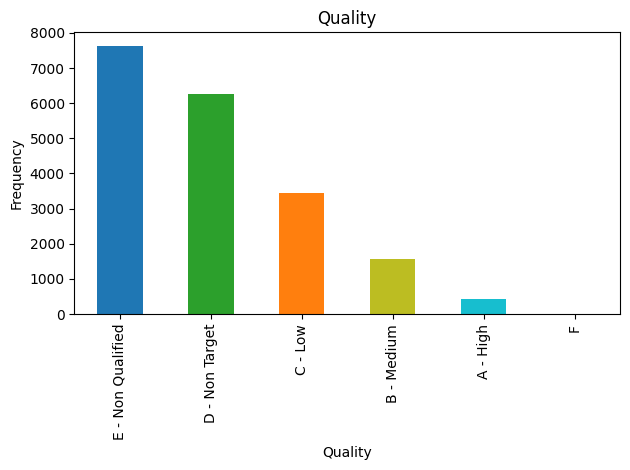

************************************************************
Stage


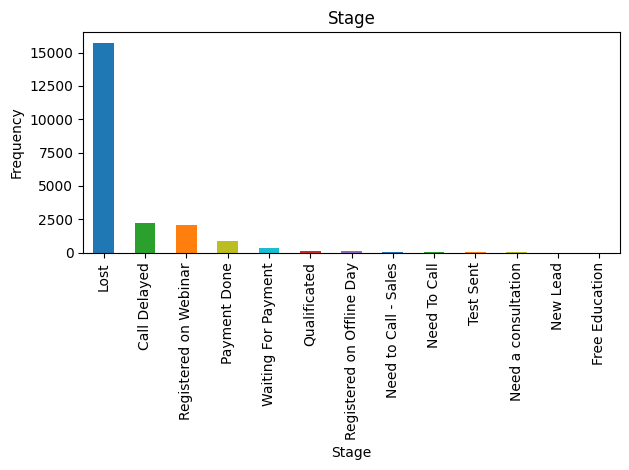

************************************************************
Lost Reason


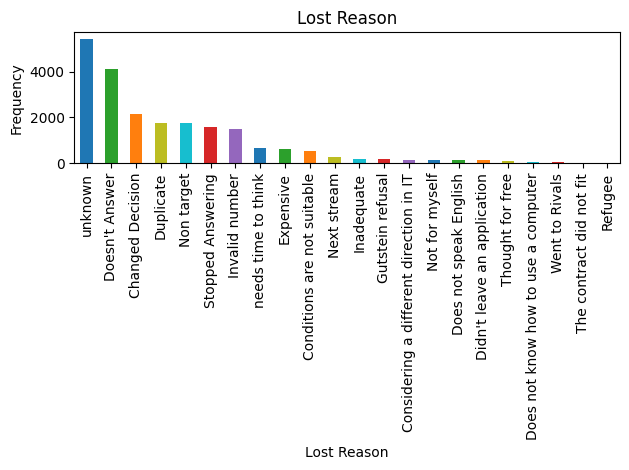

************************************************************
Page


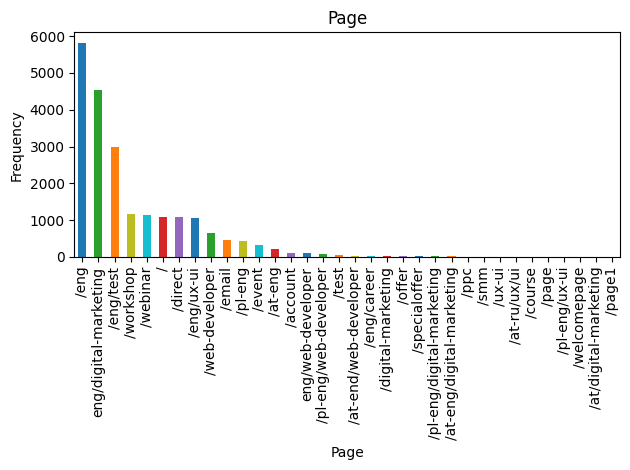

************************************************************
Source


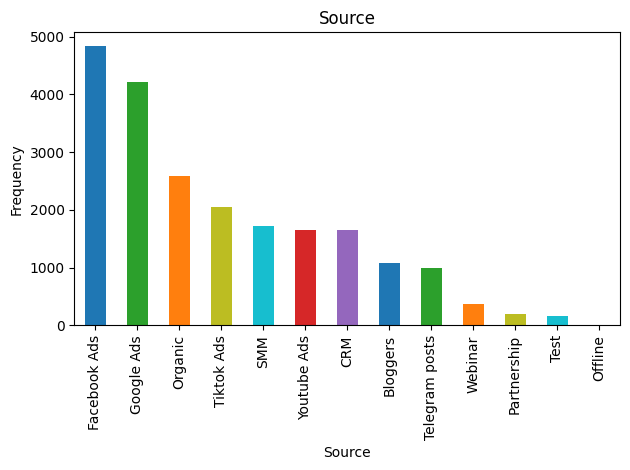

************************************************************
Payment Type


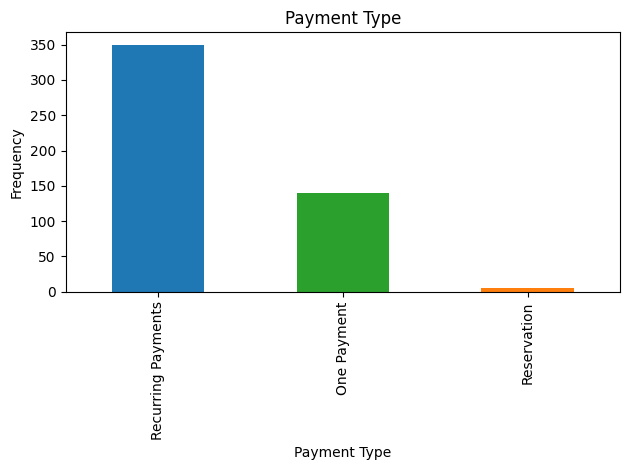

************************************************************
Product


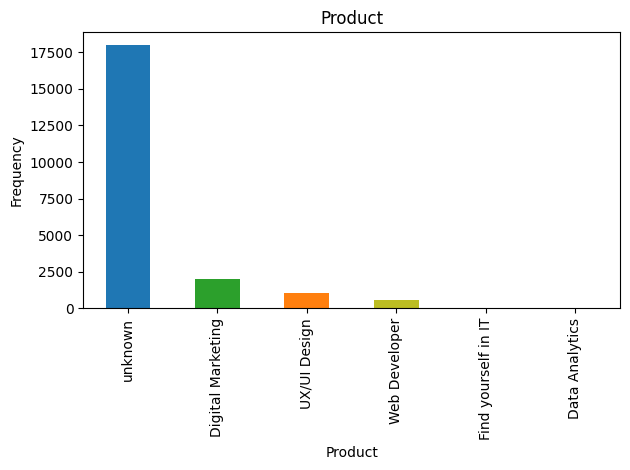

************************************************************
Education Type


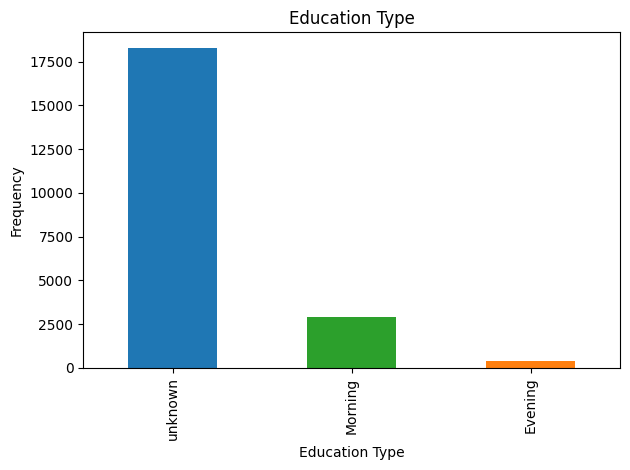

************************************************************
Course duration


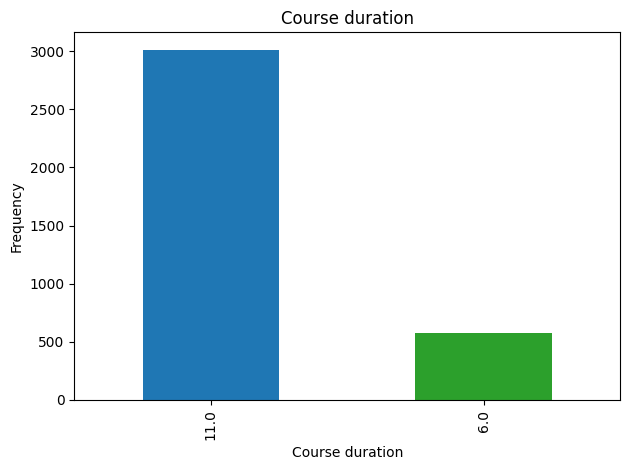

************************************************************
Months of study


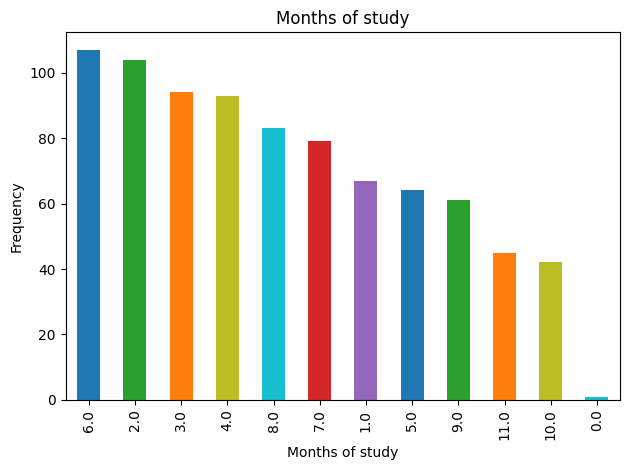

************************************************************
Initial Amount Paid


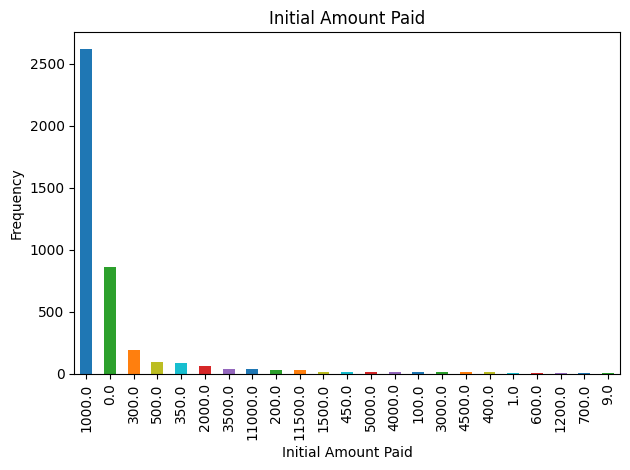

************************************************************
Offer Total Amount


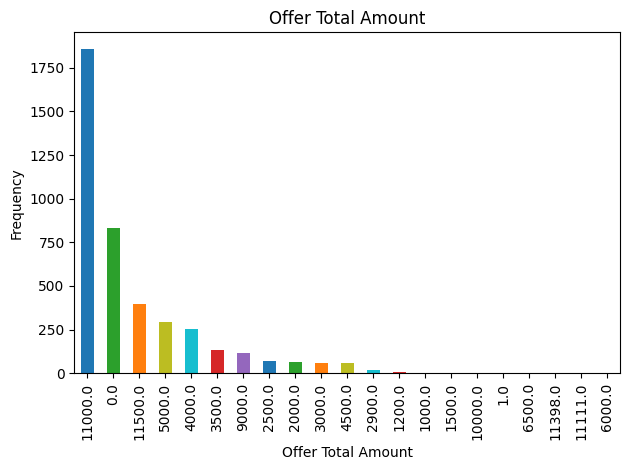

************************************************************


In [15]:
# Define a color palette
color_palette = ['#1f77b4',  # Blue
                 '#2ca02c',  # Green
                 '#ff7f0e',  # Orange
                 '#bcbd22',  # Yellow
                 '#17becf',  # Turquoise
                 '#d62728',  # Red
                 '#9467bd']  # Purple

for col in ['Quality', 'Stage', 'Lost Reason', 'Page', 'Source',
            'Payment Type', 'Product', 'Education Type',
            'Course duration', 'Months of study', 'Initial Amount Paid',
            'Offer Total Amount']:
    print(col)
    counts = deals[col].value_counts()
    counts.plot(kind='bar', color=color_palette)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    print('*' * 60)

## **Column Completion Visualization**

Build a horizontal bar chart showing column completion percentages.

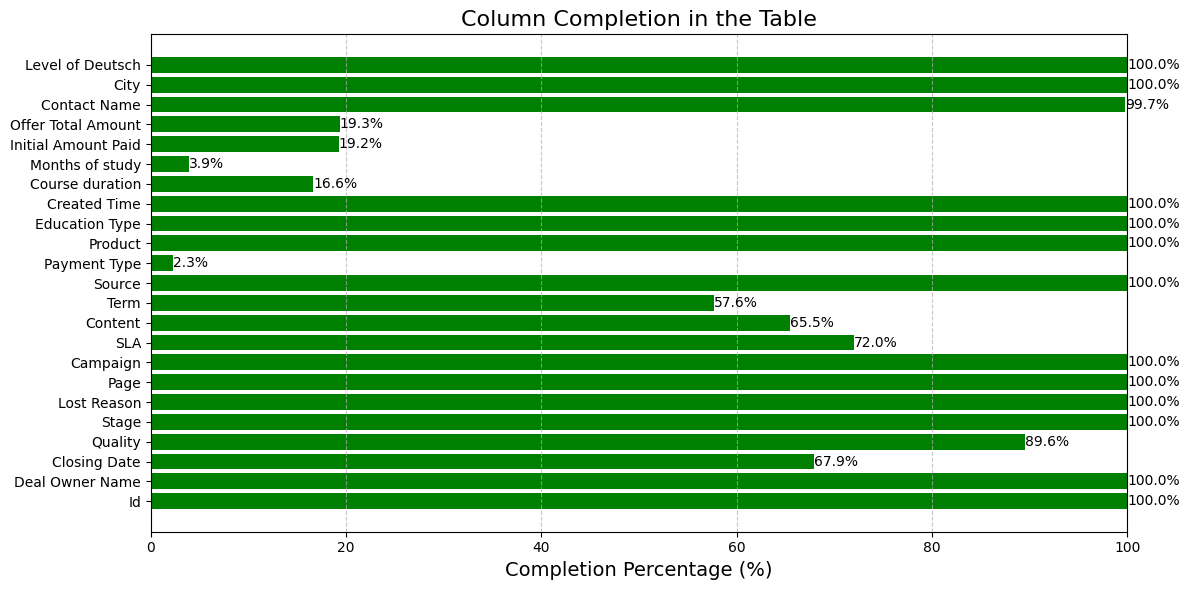

In [16]:
# Columns to analyze
columns = ['Id', 'Deal Owner Name', 'Closing Date', 'Quality', 'Stage',
           'Lost Reason', 'Page', 'Campaign', 'SLA', 'Content', 'Term', 'Source',
           'Payment Type', 'Product', 'Education Type', 'Created Time',
           'Course duration', 'Months of study', 'Initial Amount Paid',
           'Offer Total Amount', 'Contact Name', 'City', 'Level of Deutsch']

# Calculate column completion
fill_percentage = [(deals[col].notna().sum() / len(deals)) * 100 for col in columns]

# Plot chart
plt.figure(figsize=(12, 6))
bars = plt.barh(columns, fill_percentage, color='green')
plt.xlabel('Completion Percentage (%)', fontsize=14)
plt.title('Column Completion in the Table', fontsize=16)
plt.xlim(0, 100)  # Set x-axis limits
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add percentage values to bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', va='center', ha='left', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

## **Duplicate Removal**

Check for duplicates and remove them if found. In this case, no duplicates were detected.

In [17]:
deals.duplicated().sum()

0

## **Filling Specific Missing Values**

Replace NaN in the "Lost Reason" column with "unknown" and count unique values in this column.

In [18]:
replacement_value = 'unknown'
deals['Lost Reason'] = deals['Lost Reason'].fillna(replacement_value)
deals['Lost Reason'].value_counts()

,count
Lost Reason,
unknown,5446
Doesn't Answer,4134
Changed Decision,2143
Duplicate,1771
Non target,1761
Stopped Answering,1588
Invalid number,1481
needs time to think,655
Expensive,626


The next step involves processing the column 'Level of Deutsch' to bring the levels of language proficiency into a structured and consistent format. Below is an explanation and translation of the code and comments:

In [19]:
# Extracts all values from the 'Level of Deutsch' column
german_level = deals['Level of Deutsch'].values
print(german_level)

['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']


In [20]:
# Extracts unique values from the 'Level of Deutsch' column
german_level = deals['Level of Deutsch'].unique()
print(german_level)

['unknown' 'в1' 'A2' 'б1' 'b1' 'B1' 'в1-в2' 'B2' 'C2' 'с1' 'Б1' 'а2' 'а1'
 'а0' 'б2' 'Б2' 'В1' 'А2' 'B1 будет в феврале 2025'
 'Detmold, Paulinenstraße 95, 32756'
 'Сам оценивает на B2, 13 лет живет в Германии' 'в2' 'В1-В2'
 'Б1 ( ждет Б2)' 'А2-В1'
 'lэкзамен - 6 июля на В1. курсы вечером (но уверенно говорит на B1)'
 'Гражданка Германии уже год в Германии Учит немецкий и в сентябре b1 через гос-во проходит, а не через ДЖЦ, вечером учится 3 р в неделю с 18 до 21'
 '-' 'А2 ( Б1 в июне)' 'B1 в процессе обучения'
 'ЯЗ: нем В1 был экз 03.05 повтор и сейчас ждет результаты. Технический англ был. А1 сейчас. ОБР: 2 во информационные и комп сети - инженер системоте'
 'В1 в сентябре' 'Нет' 'С1' '0' 'Ждем B1' 'А1 сертиф, но по факту А2' 'a2'
 'Пока А2, сдает 17 05 B1' 'окончание 13.06 курса на b1' 'A1' 'b2'
 'Thorn-Prikker-Str. 30, Hagen, 58093' 'В2'
 'нулевой уровень, только пошел на курсы.' 'ая в1' 'Ждет результат по B1'
 'А2( ждет итоги Б!)' 'b1 экзамен будет 12 апреля' 'b1 (b2 ждет серт)'
 '

In [21]:
level_mapping = {
     'unknown': 'unknown',
    'в1': 'B1',
    'A2': 'A2',
    'б1': 'B1',
    'b1': 'B1',
    'B1': 'B1',
    'в1-в2': 'B1',
    'B2': 'B2',
    'C2': 'C2',
    'с1': 'C1',
    'Б1': 'B1',
    'а2': 'A2',
    'а1': 'A1',
    'а0': 'A0',
    'б2': 'B2',
    'Б2': 'B2',
    'В1': 'B1',
    'А2': 'A2',
    'B1 будет в феврале 2025': 'B1',
    'Detmold, Paulinenstraße 95, 32756': 'unknown',
    'Сам оценивает на B2, 13 лет живет в Германии': 'B2',
    'в2': 'B2',
    'В1-В2': 'B1',
    'Б1 ( ждет Б2)': 'B1',
    'А2-В1': 'A2',
    'lэкзамен - 6 июля на В1. курсы вечером (но уверенно говорит на B1)': 'B1',
    'Гражданка Германии уже год в Германии Учит немецкий и в сентябре b1 через гос-во проходит, а не через ДЖЦ, вечером учится 3 р в неделю с 18 до 21': 'B1',
    '-': 'unknown',
    'А2 ( Б1 в июне)': 'A2',
    'B1 в процессе обучения': 'B1',
    'ЯЗ: нем В1 был экз 03.05 повтор и сейчас ждет результаты. Технический англ был. А1 сейчас. ОБР: 2 во информационные и комп сети - инженер системоте': 'A1',
    'В1 в сентябре': 'B1',
    'Нет': 'unknown',
    'С1': 'C1',
    '0': 'A0',
    'Ждем B1': 'B1',
    'А1 сертиф, но по факту А2': 'A2',
    'a2': 'A2',
    'Пока А2, сдает 17 05 B1': 'A2',
    'окончание 13.06 курса на b1': 'B1',
    'A1': 'A1',
    'b2': 'B2',
    'Thorn-Prikker-Str. 30, Hagen, 58093': 'unknown',
    'В2': 'B2',
    'нулевой уровень, только пошел на курсы.': 'A0',
    'ая в1': 'B1',
    'Ждет результат по B1': 'B1',
    'А2( ждет итоги Б!)': 'A2',
    'b1 экзамен будет 12 апреля': 'B1',
    'b1 (b2 ждет серт)': 'B1',
    'С2': 'C2',
    'ждем B1': 'B1',
    'Paderborn 33102, Schwabenweg 10': 'unknown',
    'b1 (B2 ждет серт)': 'B1',
    'Ждем B1 со дня на день': 'B1',
    'Б2 ( учит С1)': 'B2',
    'B1 еще нет результата': 'B1',
    '31.05.2024': 'unknown',
    'Lichtenfelser Straße 25, Untersiemau 96253': 'unknown',
    'Учиться до сентября на B1': 'B1',
    'b1 9ждет экзамен)': 'B1',
    'b1+': 'B1',
    'гражданка': 'unknown',
    'b1 (ждет результат)': 'B1',
    'Б1 (учит Б2)': 'B1',
    'б2+': 'B2',
    'Гражданин': 'unknown',
    '25 лет живет в Германии': 'unknown',
    'С1 -ая , Ня -а1': 'A1',
    'Ждем результат по B1': 'B1',
    'b1 (b2 в июле экзамен)': 'B1',
    'Ждет со дня на день В1': 'B1',
    'А2 (В1 с 3 раза не сдала, бератер видела наши доки)': 'A2',
    'b1 (ждет результаты)': 'B1',
    'А2 ( повтор на Б1)': 'A2',
    'B1, сдает B2 в апреле': 'B1',
    'ждет сертификат B1': 'B1',
    'Б2( 16.02 экзамен С1)': 'B2',
    'А1-А2': 'A1',
    'b1 ждет серт на днях на руки': 'B1',
    'b1 24 февраля экзамен, англ b2': 'B1',
    'А2 ( скоро екзамен)': 'A2',
    'B1 (ждет результаты В2)': 'B1',
    'b1 (b2 15 марта экзамен)': 'B1',
    'b2 (с1 экзамен 16 февраля)': 'B2',
    'Б1 ( ждет итог Б2)': 'B1',
    'не сдавал, но гражданин': 'unknown',
    'Нет сертификатов, но есть С1 англ, неоконченное высшее в ИТ (и еще одно высшее юридическое) , очень хочет в ИТ, сильно замотивирована именно н': 'C1',
    'А2, в процессе Б1': 'A2',
    'A0': 'A0',
    'А2(Б1 в марте экз)': 'A2',
    'учит A2': 'A2',
    'Б1 ( проходит Б2)': 'B1',
    'Б1 ( ждет итог )': 'B1',
    'НЯ - В1, АЯ - В1': 'B1',
    'б1 (ждет рез-тат)': 'B1',
    'А2(ждет итоги Б1)': 'A2',
    'в1-ня , в1-ая': 'B1',
    'ня-0, но англ B2+': 'A0',
    'В': 'B1',
    'будет B1 в июне': 'B1',
    'А2( включили нем в ангебот)': 'A2',
    'а2-в1': 'A2',
    'в2-с1': 'B2',
    'курс А2-В1 - сдача в июле, но вечерняя смена инт курсов, настроен получить гутшайн уже сейчас.': 'A2',
    'B1 (B2 должна до конца февраля получить)': 'B1',
    'b1 (b2 экзамен 6 февраля)': 'B1',
    'A1-A2': 'A1',
    'Б1( может будет)': 'B1',
    'А2 ( в процессе Б1)': 'A2',
    'b1 ждет результаты': 'B1',
    'b1 ждет экзамен в феврале': 'B1',
    'В1, может уже В2?': 'B1',
    'A2 (идет доучивать В1 - 300 часов; предположительно до августа)': 'A2',
    'не учил': 'A0',
    'Без 5 минут B1 (ждет результаты экзамена)': 'B1',
    'а1-а2 , ая свободный': 'A1',
    'b2-c2': 'B2',
    'а2, англ B1': 'A2',
    'А1': 'A1',
    'А2 нем -В2 англ': 'A2',
    'Проходит сейчас B1': 'B1',
    'Ждет результат по B1 в феврале': 'B1',
    'Проходит сейчас повторно B1': 'B1',
    'b1 экзамен в феврале': 'B1',
    'Учиться на B1 во вторую смену, в первую хочет получить одобрение на обучение у нас': 'B1',
    'Б10Б2': 'B1',
    'Б1?': 'B1',
    'B1 есть, ждем B2 в конце месяца': 'B1',
    'B1-B2': 'B1',
    '?': 'unknown',
    'b1 экзамен 26 января': 'B1',
    'А0': 'A0',
    'а2 (б1 в сер января)': 'A2',
    'f2': 'A0',
    'Учиться на B1': 'B1',
    'Сдала экзамен на B1, ждет в начале февраля результат': 'B1',
    'Сдавал 8 12 на B1 - ждет результат. 3 01 - аплейт - получил B1!': 'B1',
    'Б1-Б2': 'B1',
    'б1 (до июля на В2)': 'B1',
    'А2 ( Б1 март )': 'A2',
    'А2 (весной - еще 300 часов В1)': 'A2',
    'В январе будут результаты по экзамену на B1': 'B1',
    'б2 (с1 ждет рез-тат)': 'B2',
    'ня-0, ая-B1': 'A0',
    'А2-Б1': 'A2',
    'B1 (почти, не сдала чуть) + англ В1': 'B1',
    'в1 ждем результаты': 'B1',
    'А2 ( хочет просить совмещать)': 'A2',
    'B1 (ждет результаты)': 'B1',
    'А2+': 'A2',
    'а2 (сдавала экз В1, но не сдала похоже)': 'A2',
    'в1, идет на в2': 'B1',
    'b2-c1': 'B2',
    'C1': 'C1',
    'b1-b2': 'B1',
    'не учила ( разговорный) сразу пошла работать': 'A0',
    'Б1 ( проходит Б2 )': 'B1',
    'a0-a1': 'A0',
    'Б1 ( был екзамен ждет итог )': 'B1',
    'Б2-С1': 'B2',
    'b1 (учила, но не сдала В2)': 'B1',
    'ня а2, ая в1': 'A2',
    'A2 (идет на В1)': 'A2',
    'B2-C2': 'B2',
    'немецкий - а1-а2, англ b1-b2': 'A1',
    'B2+': 'B2',
    'в1, еще нет сертификата': 'B1',
    'б1-б2': 'B1',
    'Бй': 'B1',
    'ждет результаты по B1 экзамену': 'B1',
    'b2 (ждет серт)': 'B2',
    'никакой': 'unknown',
    'в1 , хочет совмещать с в2': 'B1',
    '90': 'unknown',
    '.': 'unknown',
    'в1 (уже сдала В2)': 'B1',
    'b1 результат экзамена в феврале': 'B1',
    'в1 , экзамен на в2 15 декабря': 'B1',
    'идет на А1': 'A1',
    'УТОЧНИТЬ!': 'unknown',
    'B2 (говорит без проблем - давно здесь)': 'B2',
    'B1 (до февраля)': 'B1',
    'А2 ( Б2 в процессе)': 'A2',
    'C': 'C1',
    'б1 заканчивает': 'B1',
    'B1 (B2 экзамен в январе)': 'B1',
    '5 июля 2024 сдает экз на В2': 'B2',
    'А2 (заканчив В1 в июне)': 'A2',
    'a2-б1': 'A2',
    'В1?': 'B1',
    'b1 будет в январе экзамен, готов совмещать': 'B1',
    'b1 (b2 экзамен 2 марта)': 'B1',
    'B1 немецкий и английский Advance': 'B1',
    'A': 'A0',
    'a2 (b1 экзамен 15 июня)': 'A2',
    'B2 (ждет итог экзамена)': 'B2',
    'b1 (b2 не сдал экзамен)': 'B1',
    'В1 (учится на В2 до авг.': 'B1',
    'В2 - не сдал': 'B2',
    'B2+ (не сдавал, но говорит)': 'B2',
    'b1 (ждет серт)': 'B1',
    'B1 вроде был (18 лет назад сдавал)': 'B1',
    'А2 (сдает B1 - 12 дек) - не сдал!': 'A2',
    'УТОЧНИТЬ': 'unknown',
    'b2 ждет серт': 'B2',
    'разговорный из украины, без сертификата': 'unknown',
    'Ждет B1': 'B1',
    'сдавала А2 в сентябре': 'A2',
    'В1, учится на В2 до няоб 24': 'B1',
    'Б1 ( ждет результат Б2)': 'B1',
    'точно уровень не знаю, но говорить могу - учила сама': 'unknown',
    'А2-В1 учит': 'A2',
    'В1 (учится на В2 уже)': 'B1',
    'В январе - В2 сдает': 'B2',
    'b1 должна получить результаты в феврале': 'B1'
}

In [22]:
# Applies the mapping dictionary to normalize the 'Level of Deutsch' column
deals['Level of Deutsch'] = deals['Level of Deutsch'].map(level_mapping).fillna(deals['Level of Deutsch'])

In [23]:
# Extracts unique standardized values
german_level_new = deals['Level of Deutsch'].unique()
print(german_level_new)

['unknown' 'B1' 'A2' 'B2' 'C2' 'C1' 'A1' 'A0']


In [24]:
# Counts the frequency of each standardized language level
german_level_counts = deals['Level of Deutsch'].value_counts().reset_index()
german_level_counts.columns = ['Level of Deutsch', 'Count']

# Creates a bar chart to visualize the distribution of language levels
fig = px.bar(
    german_level_counts,
    x='Level of Deutsch',
    y='Count',
    title='Number of Entries by German Proficiency Level',
    labels={'Count': 'Count', 'Level of Deutsch': 'German Language Levels'},
    color='Count'
)

# Displays the bar chart
fig.show()

In [25]:
# Filters out entries with an "unknown" level
deals_filtered = deals[deals['Level of Deutsch'] != 'unknown']

# Counts frequency of levels in filtered data
german_level_counts = deals_filtered['Level of Deutsch'].value_counts().reset_index()
german_level_counts.columns = ['Level of Deutsch', 'Count']

# Creates a pie chart to show proportions of language levels
fig = px.pie(
    german_level_counts,
    names='Level of Deutsch',
    values='Count',
    title='Distribution of German Proficiency Levels',
    color='Level of Deutsch'
)

# Displays the pie chart
fig.show()

In [26]:
# Extracts unique city names from the 'City' column
city = deals['City'].unique()
print(city)

['unknown' 'Crailsheim' 'Dortmund' 'Stuttgart' 'München' 'Berlin' 'Wien'
 'Offenbach am Main' 'Eberbach' 'Görlitz' 'Pfedelbach' 'Unterhaching'
 'Karl-Liebknecht str. 24, Hildburghausen, Thüringen' 'Rüdesheim am Rhein'
 'Dresden' 'Gummersbach' '-' 'Kassel' 'Wenzenbach' 'Merseburg' 'Gommern'
 'Pommelsbrunn' 'Duisburg' 'Herzogenrath' 'Schwandorf' 'Mainz' 'Podskalie'
 'Zinnowitz' 'Quedlinburg' 'Poland , Gdansk , Al. Grunwaldzka 7, ap. 1a'
 'Wolfsburg' 'Weilburg' 'Dillenburg' 'Neu-Ulm' 'Lauter-Bernsbach' 'Bonn'
 'Riedstadt' 'Rosenheim' 'Mönchengladbach' 'Neuburg' 'Rostock'
 'Bad Oeynhausen' 'Chemnitz' 'Diez' 'Nürnberg' 'Laubach' 'Düren'
 'Düsseldorf' 'Zwickau' 'Bremen' 'Halle' 'Erbach' 'Jünkerath' 'Magdeburg'
 'Celle' 'Germering' 'Kleve' 'Leinfelden-Echterdingen'
 'Garmisch-Partenkirchen' 'Leipzig' 'Hof' 'Lünen' 'Murr' 'Bochum'
 'Leonberg' 'Bad Homburg vor der Höhe' 'Kiel' 'Theres' 'Lüchow' 'Stolberg'
 'Bautzen' 'Weiden' 'Osterode am Harz' 'Vor Ebersbach 1, 77761 Schiltach'
 'Göppingen' 'An

In [27]:
# Creates a mapping to standardize city names
new_city = {
    'Dortmund': 'Dortmund',
    'Crailsheim': 'Crailsheim',
    'Stuttgart': 'Stuttgart',
    'München': 'München',
    'Berlin': 'Berlin',
    'Wien': 'Wien',
    'Offenbach am Main': 'Offenbach am Main',
    'Eberbach': 'Eberbach',
    'Görlitz': 'Görlitz',
    'Pfedelbach': 'Pfedelbach',
    'Unterhaching': 'Unterhaching',
    'Hildburghausen': 'Karl-Liebknecht-Str. 24, Hildburghausen, Thüringen',
    'Rüdesheim am Rhein': 'Rüdesheim am Rhein',
    'Dresden': 'Dresden',
    'Gummersbach': 'Gummersbach',
    'Kassel': 'Kassel',
    'Wenzenbach': 'Wenzenbach',
    'Merseburg': 'Merseburg',
    'Gommern': 'Gommern',
    'Pommelsbrunn': 'Pommelsbrunn',
    'Duisburg': 'Duisburg',
    'Herzogenrath': 'Herzogenrath',
    'Schwandorf': 'Schwandorf',
    'Mainz': 'Mainz',
    'Podskalie': 'Podskalie',
    'Zinnowitz': 'Zinnowitz',
    'Quedlinburg': 'Quedlinburg',
    'Gdańsk': 'Poland, Gdańsk, Al. Grunwaldzka 7, ap. 1a',
    'Wolfsburg': 'Wolfsburg',
    'Weilburg': 'Weilburg',
    'Dillenburg': 'Dillenburg',
    'Neu-Ulm': 'Neu-Ulm',
    'Lauter-Bernsbach': 'Lauter-Bernsbach',
    'Bonn': 'Bonn',
    'Riedstadt': 'Riedstadt',
    'Rosenheim': 'Rosenheim',
    'Mönchengladbach': 'Mönchengladbach',
    'Neuburg': 'Neuburg',
    'Rostock': 'Rostock',
    'Bad Oeynhausen': 'Bad Oeynhausen',
    'Chemnitz': 'Chemnitz',
    'Diez': 'Diez',
    'Nürnberg': 'Nürnberg',
    'Laubach': 'Laubach',
    'Düren': 'Düren',
    'Düsseldorf': 'Düsseldorf',
    'Zwickau': 'Zwickau',
    'Bremen': 'Bremen',
    'Halle': 'Halle',
    'Erbach': 'Erbach',
    'Jünkerath': 'Jünkerath',
    'Magdeburg': 'Magdeburg',
    'Celle': 'Celle',
    'Germering': 'Germering',
    'Kleve': 'Kleve',
    'Leinfelden-Echterdingen': 'Leinfelden-Echterdingen',
    'Garmisch-Partenkirchen': 'Garmisch-Partenkirchen',
    'Leipzig': 'Leipzig',
    'Hof': 'Hof',
    'Lünen': 'Lünen',
    'Murr': 'Murr',
    'Bochum': 'Bochum',
    'Leonberg': 'Leonberg',
    'Bad Homburg vor der Höhe': 'Bad Homburg vor der Höhe',
    'Kiel': 'Kiel',
    'Theres': 'Theres',
    'Lüchow': 'Lüchow',
    'Stolberg': 'Stolberg',
    'Bautzen': 'Bautzen',
    'Weiden': 'Weiden',
    'Osterode am Harz': 'Osterode am Harz',
    'Göppingen': 'Göppingen',
    'Ansbach': 'Ansbach',
    'Aachen': 'Aachen',
    'Menden': 'Menden',
    'Iserlohn': 'Iserlohn',
    'Aying': 'Aying',
    'Mannheim': 'Mannheim',
    'Hamburg': 'Hamburg',
    'Einhausen': 'Einhausen',
    'Minden': 'Minden',
    'Igalo': 'Igalo',
    'Süßen': 'Süßen',
    'Flensburg': 'Flensburg',
    'Tönning': 'Tönning',
    'Aschaffenburg': 'Aschaffenburg',
    'Holzwickede': 'Holzwickede',
    'Villingen‑Schwenningen': 'Villingen‑Schwenningen',
    'Ochtrup': 'Ochtrup',
    'Klosterlechfeld': 'Klosterlechfeld',
    'Straubing': 'Straubing',
    'Augsburg': 'Augsburg',
    'Rheine': 'Rheine',
    'Singen': 'Singen',
    'Werl': 'Werl',
    'Schweinfurt': 'Schweinfurt',
    'Ditzingen': 'Ditzingen',
    'Frankfurt': 'Frankfurt',
    'Waldbronn': 'Waldbronn',
    'Essen': 'Essen',
    'Weil am Rhein': 'Weil am Rhein',
    'Lahnstein': 'Lahnstein',
    'Osnabrück': 'Osnabrück',
    'Lierschied': 'Lierschied',
    'Eggenfelden': 'Eggenfelden',
    'Trebgast': 'Trebgast',
    'Verl': 'Verl',
    'Wesel': 'Wesel',
    'Frammersbach': 'Frammersbach',
    'Grevesmühlen': 'Grevesmühlen',
    'Perleberg': 'Perleberg',
    'Michelfeld': 'Michelfeld',
    'Stralsund': 'Stralsund',
    'Zeitz': 'Zeitz',
    'Novi Sad': 'Novi Sad',
    'Münster': 'Münster',
    'Helmstedt': 'Helmstedt',
    'Krefeld': 'Krefeld',
    'Rastatt': 'Rastatt',
    'Detmold': 'Detmold',
    'Weinstadt': 'Weinstadt',
    'Friedrichshafen': 'Friedrichshafen',
    'Wächtersbach': 'Wächtersbach',
    'Weißenburg in Bayern': 'Weißenburg in Bayern',
    'Solingen': 'Solingen',
    'Worms': 'Worms',
    'Schlangen': 'Schlangen',
    'Schwarzenberg': 'Schwarzenberg',
    'Ludwigsburg': 'Ludwigsburg',
    'Büchen': 'Büchen',
    'Remscheid': 'Remscheid',
    'Kulmbach': 'Kulmbach',
    'Burghausen': 'Burghausen',
    'Meinerzhagen': 'Meinerzhagen',
    'Torgau': 'Torgau',
    'Coesfeld': 'Coesfeld',
    'Hartmannsdorf': 'Hartmannsdorf',
    'Adelschlag': 'Adelschlag',
    'Eisenberg': 'Eisenberg',
    'Kehl': 'Kehl',
    'Delbrück': 'Delbrück',
    'Kempten': 'Kempten',
    'Marburg': 'Marburg',
    'Oranienburg': 'Oranienburg',
    'Siegen': 'Siegen',
    'Castrop-Rauxel': 'Castrop-Rauxel',
    'Kalkar': 'Kalkar',
    'Würzburg': 'Würzburg',
    'Molsberg': 'Molsberg',
    'Rust': 'Rust',
    'Bad Hersfeld': 'Bad Hersfeld',
    'Südlohn': 'Südlohn',
    'Erfurt': 'Erfurt',
    'Wiesenttal': 'Wiesenttal',
    'Altenstadt': 'Altenstadt',
    'Sankt Leon-Rot': 'Sankt Leon-Rot',
    'Friedrichsdorf': 'Friedrichsdorf',
    'Heinsberg': 'Heinsberg',
    'Passau': 'Passau',
    'Darmstadt': 'Darmstadt',
    'Ruhla': 'Ruhla',
    'Bad Nauheim': 'Bad Nauheim',
    'Bärnau': 'Bärnau',
    'Erftstadt': 'Erftstadt',
    'Arnsberg': 'Arnsberg',
    'Pullach im Isartal': 'Pullach im Isartal',
    'Gelnhausen': 'Gelnhausen',
    'Liederbach am Taunus': 'Liederbach am Taunus',
    'Gröditz': 'Gröditz',
    'Trier': 'Trier',
    'Buxtehude': 'Buxtehude',
    'Uelzen': 'Uelzen',
    'Aldenhoven': 'Aldenhoven',
    'Lindau': 'Lindau',
    'Weilerbach': 'Weilerbach',
    'Friedberg': 'Friedberg',
    'Wunstorf': 'Wunstorf',
    'Rottenburg': 'Rottenburg'
}

All subsequent analysis of the available data will be conducted in the same manner.

# **Calls**

The "calls" table contains information about phone calls that were registered in the system.

In general, the data provides insights for analyzing customer interactions, evaluating employee performance, and understanding call patterns. This data can be used for:



*   Analyzing team performance.
*   Assessing customer service quality.
*   Optimizing customer interaction processes.
*   Predicting customer needs based on call history.









In [28]:
# Opening and reading the file
calls = pd.read_csv('/content/Calls (Done) (1).xlsx - Calls.csv', dtype={'id': str, 'CONTACTID': str})

In [29]:
calls.head()

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Dialled Number,Outgoing Call Status,Scheduled in CRM,Tag
0,5805028000000805001,30.06.2023 08:43,John Doe,NaN,Inbound,171.0,Received,NaN,NaN,NaN,NaN
1,5805028000000768006,30.06.2023 08:46,John Doe,NaN,Outbound,28.0,Attended Dialled,NaN,Completed,False,NaN
2,5805028000000764027,30.06.2023 08:59,John Doe,NaN,Outbound,24.0,Attended Dialled,NaN,Completed,False,NaN
3,5805028000000787003,30.06.2023 09:20,John Doe,5805028000000645014,Outbound,6.0,Attended Dialled,NaN,Completed,False,NaN
4,5805028000000768019,30.06.2023 09:30,John Doe,5805028000000645014,Outbound,11.0,Attended Dialled,NaN,Completed,False,NaN


In [30]:
calls.columns

Index(['Id', 'Call Start Time', 'Call Owner Name', 'CONTACTID', 'Call Type',
       'Call Duration (in seconds)', 'Call Status', 'Dialled Number',
       'Outgoing Call Status', 'Scheduled in CRM', 'Tag'],
      dtype='object')

In [31]:
calls.shape

(95874, 11)

In [32]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          95874 non-null  object 
 1   Call Start Time             95874 non-null  object 
 2   Call Owner Name             95874 non-null  object 
 3   CONTACTID                   91941 non-null  object 
 4   Call Type                   95874 non-null  object 
 5   Call Duration (in seconds)  95791 non-null  float64
 6   Call Status                 95874 non-null  object 
 7   Dialled Number              0 non-null      float64
 8   Outgoing Call Status        86875 non-null  object 
 9   Scheduled in CRM            86875 non-null  object 
 10  Tag                         0 non-null      float64
dtypes: float64(3), object(8)
memory usage: 8.0+ MB


In [33]:
print(calls['Dialled Number'].nunique())

0


In [34]:
# Removing columns that do not contain any information
calls = calls.drop(columns=['Dialled Number', 'Tag'])

In [35]:
# Changing the data type from object to datetime
calls['Call Start Time'] = pd.to_datetime(calls['Call Start Time'])

<ipython-input-35-ea944aeb237c>:2: UserWarning:

Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [36]:
#Descriptive statistics for numeric and object data
calls.describe()

,Call Start Time,Call Duration (in seconds)
count,95874,95791.000000
mean,2024-02-05 12:34:44.369484800,164.977263
min,2023-06-30 08:43:00,0.000000
25%,2023-11-24 11:07:30,4.000000
50%,2024-02-19 12:19:30,8.000000
75%,2024-04-22 19:10:00,98.000000
max,2024-06-21 15:31:00,7625.000000
std,NaN,401.410826


In [37]:
calls.describe(include=object)

,Id,Call Owner Name,CONTACTID,Call Type,Call Status,Outgoing Call Status,Scheduled in CRM
count,95874,95874,91941,95874,95874,86875,86875
unique,95872,33,15214,3,11,4,2
top,"5,80503E+18",Yara Edwards,5805028000003329100,Outbound,Attended Dialled,Completed,False
freq,3,9059,94,86875,70703,86792,86733


In [38]:
# Searching for duplicates based on specified columns
duplicates = calls[calls.duplicated(subset=['Call Start Time', 'Call Owner Name', 'Call Duration (in seconds)'], keep=False)]

In [39]:
# Displaying the number of duplicates and the duplicates themselves
print(f'Number of duplicates: {duplicates.shape[0]}')
print(duplicates)

Number of duplicates: 6902
                        Id     Call Start Time Call Owner Name  \
34     5805028000001140014 2023-07-06 17:15:00   Alice Johnson   
35     5805028000001167001 2023-07-06 17:15:00   Alice Johnson   
101    5805028000001372054 2023-07-08 16:43:00        John Doe   
102    5805028000001348077 2023-07-08 16:43:00        John Doe   
254    5805028000001568042 2023-07-12 19:23:00      Jane Smith   
...                    ...                 ...             ...   
95804  5805028000056832311 2024-06-21 14:17:00    Yara Edwards   
95833  5805028000056845313 2024-06-21 14:47:00   Ulysses Adams   
95834  5805028000056873560 2024-06-21 14:47:00   Ulysses Adams   
95838  5805028000056834447 2024-06-21 14:55:00        John Doe   
95839  5805028000056892435 2024-06-21 14:55:00        John Doe   

                 CONTACTID Call Type  Call Duration (in seconds)  \
34     5805028000001129001  Outbound                         0.0   
35     5805028000001129001  Outbound        

In [40]:
# Removing duplicates based on specified columns
calls_cleaned = calls.drop_duplicates(subset=['Call Start Time', 'Call Owner Name', 'Call Duration (in seconds)'], keep='first')

In [41]:
# Analyzing specific columns and plotting their values
for col in ['Call Owner Name', 'Call Type',
       'Call Duration (in seconds)', 'Call Status', 'Outgoing Call Status',
       'Scheduled in CRM']:
    print(calls[col].value_counts())
    plt.show()
    print('*' * 60)
    print()
    print()

Call Owner Name
Yara Edwards       9059
Julia Nelson       7446
Ian Miller         7215
Charlie Davis      7213
Diana Evans        6857
Ulysses Adams      6085
Amy Green          5982
Nina Scott         5581
Victor Barnes      5439
Kevin Parker       5406
Paula Underwood    4580
Quincy Vincent     4384
Jane Smith         3753
Cara Iverson       3300
John Doe           2986
Ben Hall           2947
Alice Johnson      1251
Mason Roberts      1166
Derek James         948
George King         850
Zachary Foster      523
Eva Kent            498
Fiona Jackson       470
Sam Young           457
Rachel White        441
Xander Dean         304
Ethan Harris        280
Hannah Lee          175
Wendy Clark         162
Bob Brown            99
Oliver Taylor        10
Tina Zhang            5
Laura Quinn           2
Name: count, dtype: int64
************************************************************


Call Type
Outbound    86875
Missed       5921
Inbound      3078
Name: count, dtype: int64
*************

Call Owner Name


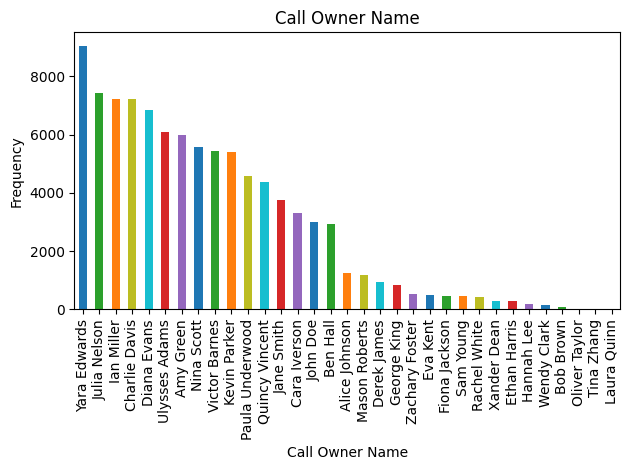

************************************************************
Call Type


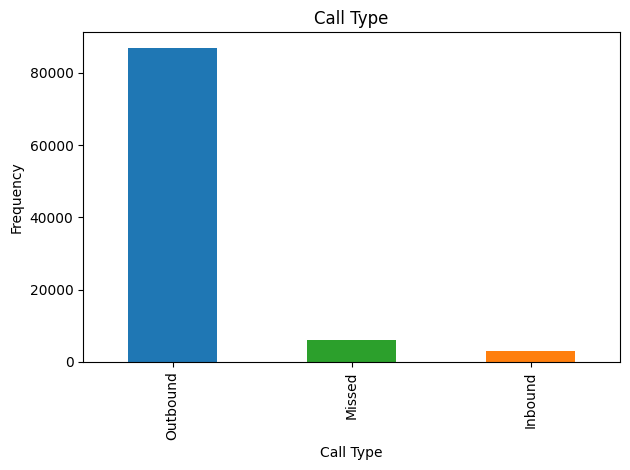

************************************************************
Call Status


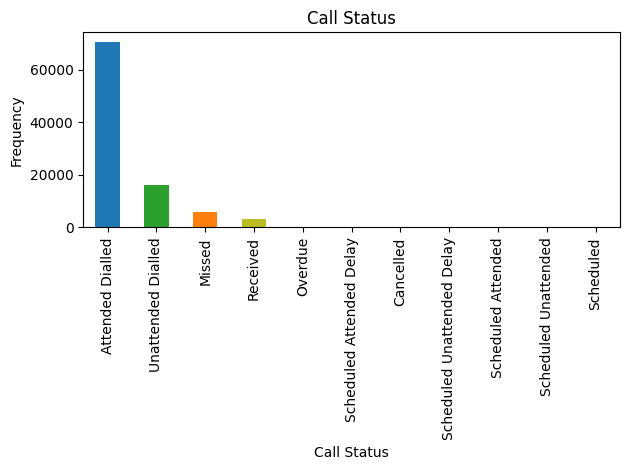

************************************************************
Outgoing Call Status


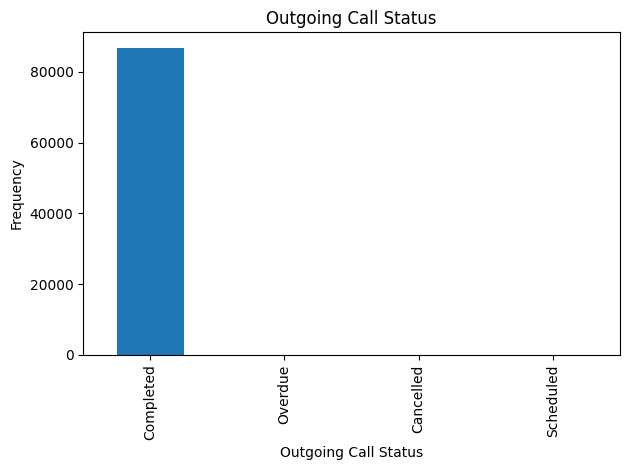

************************************************************
Scheduled in CRM


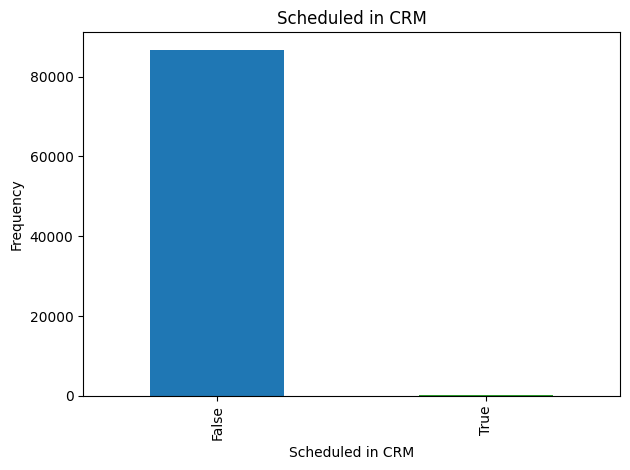

************************************************************


In [42]:
# Definition of the palette with blue, green, and yellow tones
color_palette = ['#1f77b4',  # Blue
                 '#2ca02c',  # Green
                 '#ff7f0e',  # Orange (can be replaced with yellow)
                 '#bcbd22',  # Yellow
                 '#17becf',  # Turquoise
                 '#d62728',  # Red (can be replaced with another yellow)
                 '#9467bd']  # Purple (can be replaced with another green)

# Ensure you are using the correct DataFrame, for example, `calls`
for col in ['Call Owner Name', 'Call Type',
            'Call Status', 'Outgoing Call Status',
            'Scheduled in CRM']:
    print(col)
    # Ensure you are using the correct DataFrame
    calls[col].value_counts().plot(kind='bar', color=color_palette)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    #plt.xticks(rotation=45)
    plt.tight_layout()  # For better display
    plt.show()
    print('*' * 60)

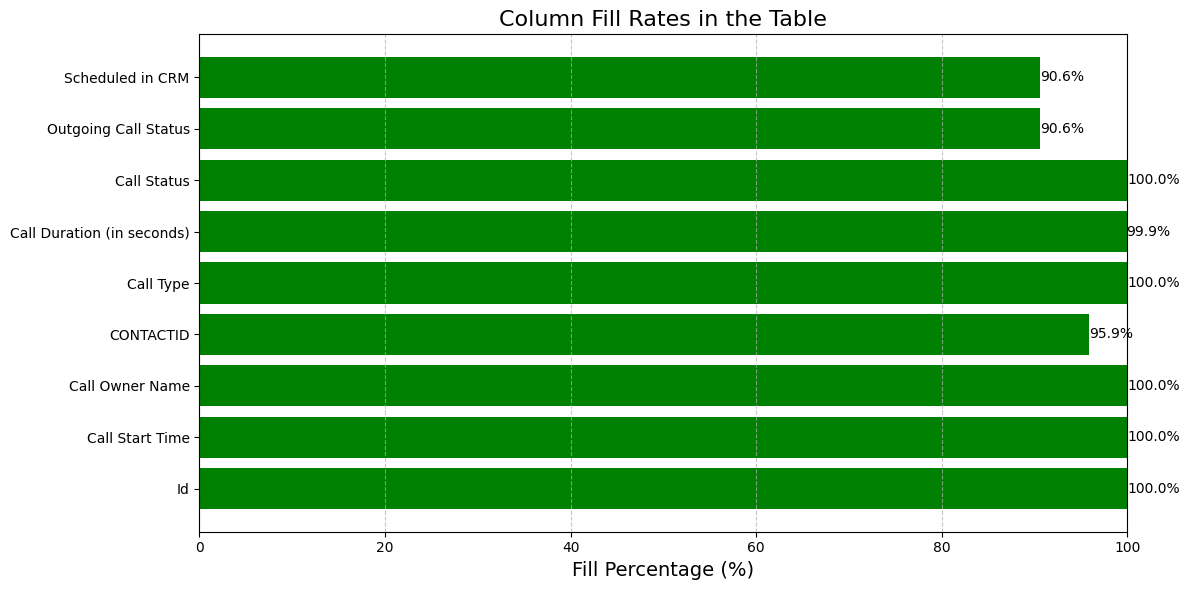

In [43]:
# List of columns for analysis
columns = ['Id', 'Call Start Time', 'Call Owner Name', 'CONTACTID', 'Call Type',
           'Call Duration (in seconds)', 'Call Status', 'Outgoing Call Status',
           'Scheduled in CRM']

# Ensure you are using the correct DataFrame
# For example, if you have the `calls` DataFrame
fill_percentage = [(calls[col].notna().sum() / len(calls)) * 100 for col in columns]

# Creating a graph
plt.figure(figsize=(12, 6))
bars = plt.barh(columns, fill_percentage, color='green')
plt.xlabel('Fill Percentage (%)', fontsize=14)
plt.title('Column Fill Rates in the Table', fontsize=16)
plt.xlim(0, 100)  # Setting X-axis limits from 0 to 100
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Displaying percentages on each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', va='center', ha='left', fontsize=10)

# Displaying the graph
plt.tight_layout()
plt.show()

# **Contacts**

The "contacts" table contains information about contacts, which are part of the Customer Relationship Management (CRM) system.

In [44]:
contacts = pd.read_csv('/content/Contacts (Done).xlsx - Contacts.csv', dtype={'Id': str})
contacts

,Id,Contact Owner Name,Created Time,Modified Time
0,5805028000000645014,Rachel White,27.06.2023 11:28,22.12.2023 13:34
1,5805028000000872003,Charlie Davis,03.07.2023 11:31,21.05.2024 10:23
2,5805028000000889001,Bob Brown,02.07.2023 22:37,21.12.2023 13:17
3,5805028000000907006,Bob Brown,03.07.2023 05:44,29.12.2023 15:20
4,5805028000000939010,Nina Scott,04.07.2023 10:11,16.04.2024 16:14
...,...,...,...,...
18543,5805028000056889209,Ulysses Adams,21.06.2024 12:11,21.06.2024 14:11
18544,5805028000056889351,Eva Kent,21.06.2024 13:32,21.06.2024 15:32
18545,5805028000056892018,Eva Kent,21.06.2024 10:21,21.06.2024 12:21
18546,5805028000056892055,Yara Edwards,21.06.2024 10:22,21.06.2024 12:23


In [45]:
contacts.columns

Index(['Id', 'Contact Owner Name', 'Created Time', 'Modified Time'], dtype='object')

In [46]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  18548 non-null  object
 1   Contact Owner Name  18548 non-null  object
 2   Created Time        18548 non-null  object
 3   Modified Time       18548 non-null  object
dtypes: object(4)
memory usage: 579.8+ KB


In [47]:
# Converting columns to datetime format
contacts['Created Time'] = pd.to_datetime(contacts['Created Time'])
contacts['Modified Time'] = pd.to_datetime(contacts['Modified Time'])

<ipython-input-47-aff15f3c85c0>:2: UserWarning:

Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-47-aff15f3c85c0>:3: UserWarning:

Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [48]:
contacts.duplicated().sum()

0

In [49]:
contacts.columns

Index(['Id', 'Contact Owner Name', 'Created Time', 'Modified Time'], dtype='object')

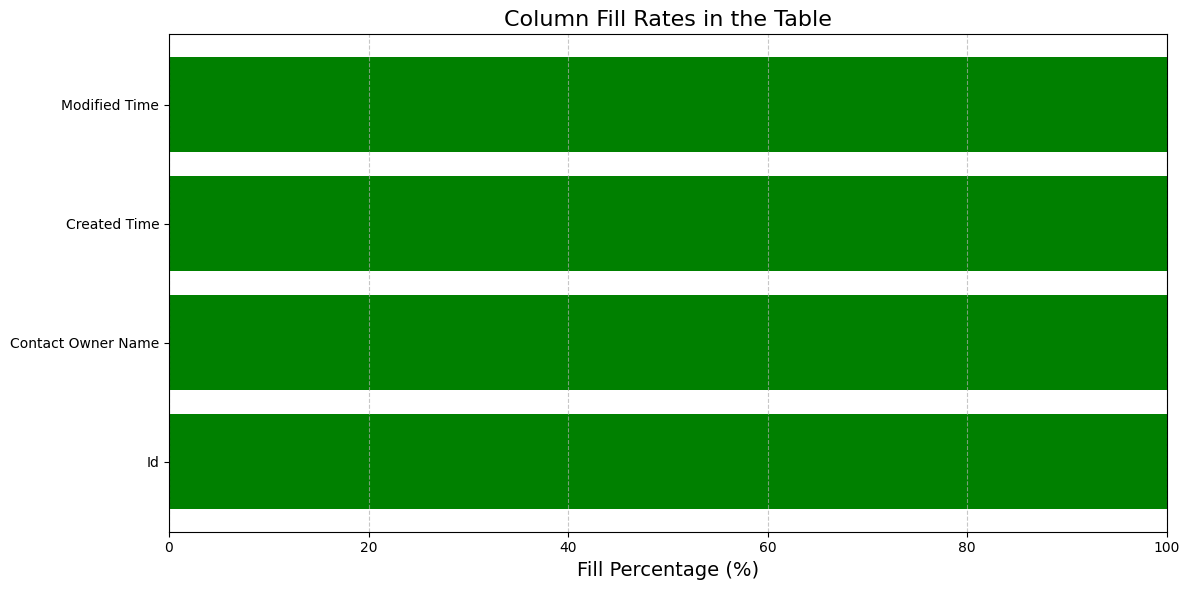

In [50]:
# List of columns for analysis
columns = ['Id', 'Contact Owner Name', 'Created Time', 'Modified Time']

# Calculating column fill rates
fill_percentage = [(contacts[col].notna().sum() / len(contacts)) * 100 for col in columns]

# Creating a graph
plt.figure(figsize=(12, 6))
plt.barh(columns, fill_percentage, color='green')
plt.xlabel('Fill Percentage (%)', fontsize=14)
plt.title('Column Fill Rates in the Table', fontsize=16)
plt.xlim(0, 100)  # Setting X-axis limits from 0 to 100
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Displaying the graph
plt.tight_layout()
plt.show()

# **Spend**

The "spend" table contains information about advertising expenses and related metrics.

In [51]:
spend = pd.read_csv('/content/Spend (Done).xlsx - Spend.csv')
spend.head()

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,"0,00€",0,NaN,NaN
1,2023-07-03,Google Ads,performancemax_eng_DE,4,"0,01€",1,NaN,NaN
2,2023-07-03,Facebook Ads,NaN,0,"0,00€",0,NaN,NaN
3,2023-07-03,Google Ads,NaN,0,"0,00€",0,NaN,NaN
4,2023-07-03,CRM,NaN,0,"0,00€",0,NaN,NaN


In [52]:
spend.columns

Index(['Date', 'Source', 'Campaign', 'Impressions', 'Spend', 'Clicks',
       'AdGroup', 'Ad'],
      dtype='object')

In [53]:
spend.shape

(20779, 8)

In [54]:
spend.duplicated().sum()

917

In [55]:
spend["Date"] = pd.to_datetime(spend["Date"])

In [56]:
# Removing the euro symbol and replacing the comma with a dot
spend['Spend'] = spend['Spend'].astype(str)  # Convert to string if not already a string type
spend['Spend'] = spend['Spend'].str.replace('€', '', regex=False)  # Remove euro symbol
spend['Spend'] = spend['Spend'].str.replace(',', '.', regex=False)  # Replace comma with dot

In [57]:
# Converting string values to numeric format (float64)
spend['Spend'] = pd.to_numeric(spend['Spend'], errors='coerce')

In [58]:
spend['Spend'] = spend['Spend'].fillna(0)

In [59]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         20779 non-null  datetime64[ns]
 1   Source       20779 non-null  object        
 2   Campaign     14785 non-null  object        
 3   Impressions  20779 non-null  int64         
 4   Spend        20779 non-null  float64       
 5   Clicks       20779 non-null  int64         
 6   AdGroup      13951 non-null  object        
 7   Ad           13951 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.3+ MB


In [60]:
spend['Spend'].value_counts()

,count
Spend,
0.00,6511
0.01,434
0.02,344
0.04,242
0.05,196
...,...
20.17,1
48.29,1
11.13,1


In [61]:
for col in ['Date', 'Source', 'Campaign', 'Impressions', 'Spend', 'Clicks',
       'AdGroup', 'Ad']:

                   print(col)
                   print(spend[col].value_counts())
                   plt.show()
                   print('*' * 60)
                   print()
                   print()

Date
Date
2024-04-25    100
2024-04-15    100
2024-04-13     99
2024-04-16     99
2024-04-14     98
             ... 
2023-07-12     29
2023-07-11     28
2023-07-04     21
2023-07-05     21
2023-07-03     17
Name: count, Length: 355, dtype: int64
************************************************************


Source
Source
Facebook Ads      9732
Tiktok Ads        3066
Youtube Ads       1926
Google Ads        1428
Telegram posts    1003
Bloggers           787
Webinar            766
SMM                614
Organic            518
CRM                355
Test               262
Partnership        234
Offline             61
Radio               27
Name: count, dtype: int64
************************************************************


Campaign
Campaign
12.07.2023wide_DE              2073
02.07.23wide_DE                1685
04.07.23recentlymoved_DE       1398
youtube_shorts_DE              1223
07.07.23LAL_DE                 1181
03.07.23women                  1171
12.09.23interests_Uxui_DE      

Visualization of columns from the "Spend" table

In [62]:
# Defining a new palette
color_palette = ['#FF5733',  # Bright red
                 '#33FF57',  # Bright green
                 '#3357FF',  # Bright blue
                 '#FF33A1',  # Bright pink
                 '#FFBD33',  # Bright yellow
                 '#33FFF6',  # Bright turquoise
                 '#A833FF']  # Bright purple

# List of columns for analysis
columns = ['Source', 'Campaign', 'AdGroup']

# Creating graphs for each column
for col in columns:
    counts = spend[col].dropna().value_counts().reset_index()
    counts.columns = [col, 'Count']

    fig = px.bar(counts, x=col, y='Count',
                 title=f'{col} (without NaN)',
                 color=col,
                 text='Count',  # Adding text to display above bars
                 color_discrete_sequence=color_palette)

    fig.update_traces(texttemplate='%{text}', textposition='outside')  # Configuring text display
    fig.update_layout(yaxis_title='Count', xaxis_title=col)

    # Displaying the graph
    fig.show()

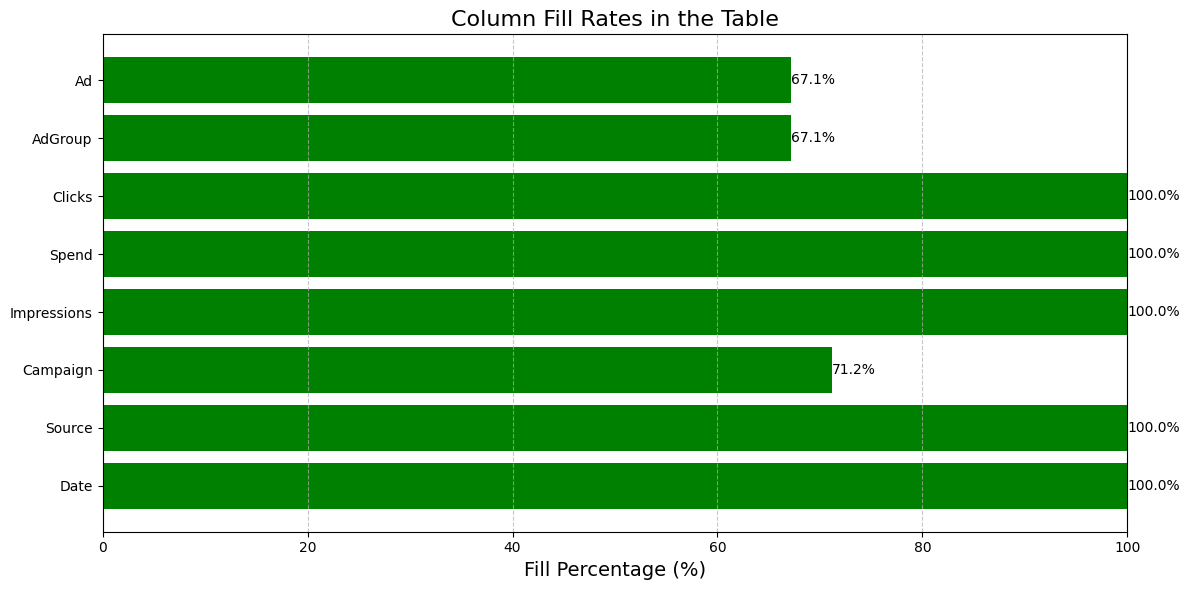

In [63]:
# List of columns for analysis
columns = ['Date', 'Source', 'Campaign', 'Impressions', 'Spend', 'Clicks', 'AdGroup', 'Ad']

# Calculating column fill rates
fill_percentage = [(spend[col].notna().sum() / len(spend)) * 100 for col in columns]

# Creating a graph
plt.figure(figsize=(12, 6))
bars = plt.barh(columns, fill_percentage, color='green')
plt.xlabel('Fill Percentage (%)', fontsize=14)
plt.title('Column Fill Rates in the Table', fontsize=16)
plt.xlim(0, 100)  # Setting X-axis limits from 0 to 100
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Displaying percentages on each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}%',
             va='center', ha='left', fontsize=10)

# Displaying the graph
plt.tight_layout()
plt.show()

A check is performed for duplicate entries, and they are subsequently removed.

In [64]:
# Checking the number of duplicates
duplicate_count = spend.duplicated().sum()
print(f'Number of duplicates: {duplicate_count}')

Number of duplicates: 917


In [65]:
# Removing duplicates
spend_cleaned = spend.drop_duplicates()

# Checking the number of duplicates after removal
duplicate_count_after = spend_cleaned.duplicated().sum()
print(f'Number of duplicates after removal: {duplicate_count_after}')

# Displaying the cleaned DataFrame
print(spend_cleaned)

Number of duplicates after removal: 0
            Date        Source                  Campaign  Impressions  Spend  \
0     2023-07-03    Google Ads            gen_analyst_DE            6   0.00   
1     2023-07-03    Google Ads     performancemax_eng_DE            4   0.01   
2     2023-07-03  Facebook Ads                       NaN            0   0.00   
3     2023-07-03    Google Ads                       NaN            0   0.00   
4     2023-07-03           CRM                       NaN            0   0.00   
...          ...           ...                       ...          ...    ...   
20774 2024-06-21  Facebook Ads           17.03.24wide_AT            7   0.07   
20775 2024-06-21    Tiktok Ads         12.07.2023wide_DE           61   0.16   
20776 2024-06-21   Partnership                       NaN            0   0.00   
20777 2024-06-21    Tiktok Ads                       NaN            0   0.00   
20778 2024-06-21  Facebook Ads  04.07.23recentlymoved_DE            7   0.05   

 

Finally, all processed tables need to be combined and saved into a single file for subsequent work.

In [66]:
# Combining all DataFrames into a single dictionary
dataframes = {
    'deals': deals,
    'calls': calls,
    'contacts': contacts,
    'spend': spend
}

# Saving to a file
with open('Tables.pkl', 'wb') as f:
    pickle.dump(dataframes, f)

print('All data successfully saved to file Table.pkl!')

# Downloading the file to the computer
files.download('Tables.pkl')

All data successfully saved to file Table.pkl!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>